In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

In [20]:
sales_data = pd.read_csv(r'C:\Users\amank\OneDrive\Desktop\Car_Forcasting\data\processed_data\sales_data_clean.csv')

In [21]:
sales_data.head()

,STOCKNO,INVOICEDAT,BRANCHNO,Make,Model,SALETYPE,SALEPRICE,COSTPRICE,METALPROFIT,Mileage,Make_new,Model_new
0,5,2021-05-21,1,ford,Ford Transit Variants,New Retail,33165.0,28857.75,4307.250000,NaN,ford,Ford Transit Variants
1,8,2021-06-28,1,ford,Ford Focus Variants,Used Sale BFC VAT Q,13332.5,10833.33,2499.170000,12959.0,ford,Ford Focus Variants
2,10,2021-06-03,1,ford,ecosport,Used Sale BFC Margin,12299.0,11050.00,1040.833333,21837.0,ford,ecosport
3,12,2021-07-07,6,ford,Ford Fiesta Variants,Used Sale BFC Margin,14299.0,13000.00,1082.500000,14842.0,ford,Ford Fiesta Variants
4,16,2021-05-14,1,ford,Ford Focus Variants,Used Sale BFC Margin,13710.0,13150.00,466.666667,16250.0,ford,Ford Focus Variants


In [22]:
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data

,count
INVOICEDAT,
2021-05-01,1
2021-05-04,1
2021-05-05,8
2021-05-06,15
2021-05-07,4
...,...
2024-01-27,3
2024-01-28,1
2024-01-29,95


In [23]:
from pmdarima import auto_arima

model = auto_arima(data['count'], seasonal=False, stepwise=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  881
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4030.264
Date:                Sat, 26 Oct 2024   AIC                           8080.528
Time:                        19:20:32   BIC                           8128.327
Sample:                             0   HQIC                          8098.807
                                - 881                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1769      0.047      3.756      0.000       0.085       0.269
ar.L2         -0.9254      0.045    -20.631      0.000      -1.013      -0.837
ar.L3          0.0139      0.047      0.293      0.7

C:\Users\amank\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


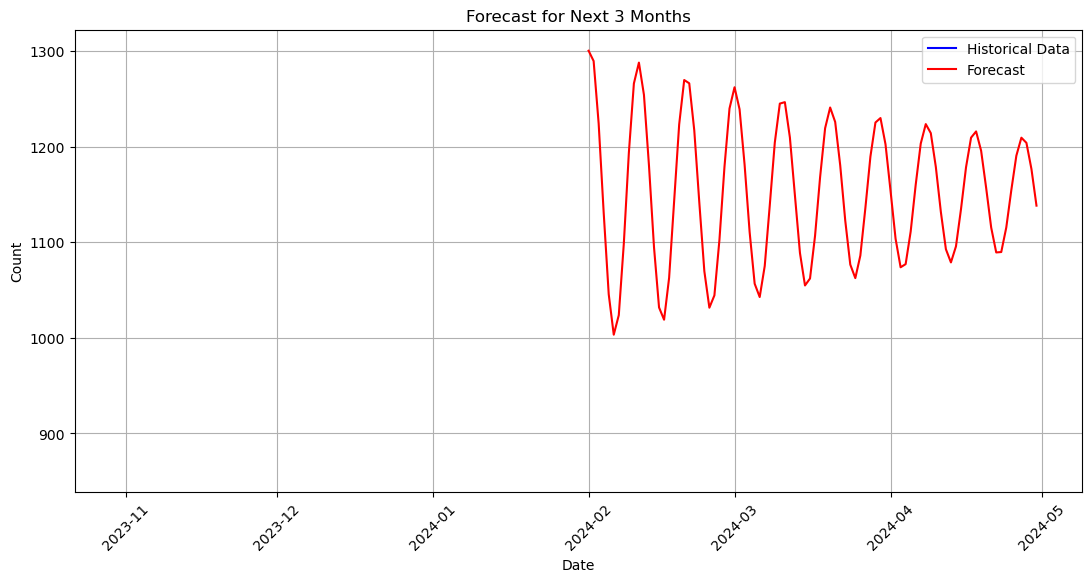

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Ensure the index is a datetime type
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Fit the ARIMA model (p, d, q parameters need tuning)
model = ARIMA(data['count'], order=(4, 1, 5))  # Example order, tune as necessary
model_fit = model.fit()

# Forecast for the next 90 days
forecast = model_fit.forecast(steps=90)

# Create a date range for the forecast
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the historical data and the forecast
plt.figure(figsize=(13, 6))
plt.plot(data.index[870:], data['count'][870:], label='Historical Data', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Forecast for Next 3 Months')
plt.legend()
plt.grid()
plt.show()

2024-02-29    1005.523395
2024-03-31    1012.747615
2024-04-30    1012.532381
Freq: ME, Name: predicted_mean, dtype: float64


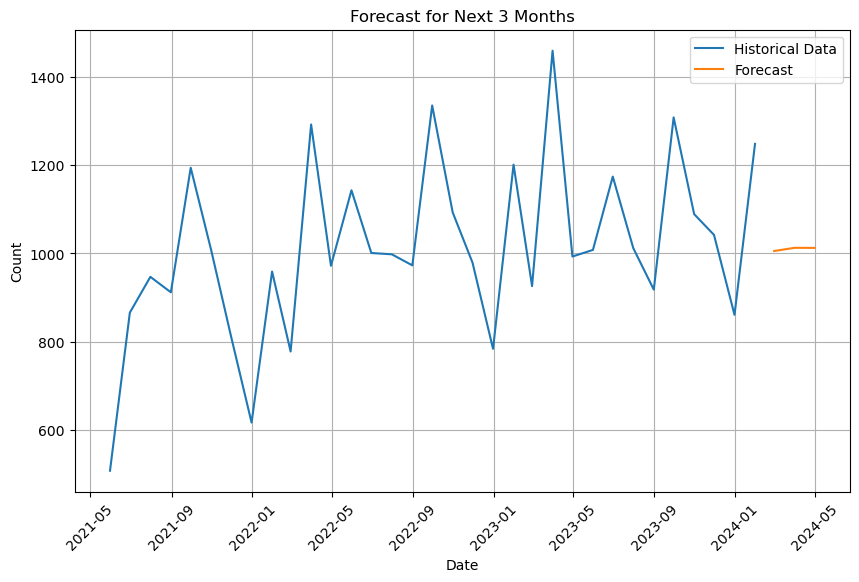

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)

# Convert the data to monthly frequency and sum values within each month
data = data.resample('M').sum()

# Fit the ARIMA model (p, d, q parameters need tuning)
model = ARIMA(data['count'], order=(1, 0, 0))  # Example order, tune as necessary
model_fit = model.fit()

# Forecast for the next 90 days
forecast = model_fit.forecast(steps=3)

# Create a date range for the forecast
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=3, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

print(forecast_series)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['count'], label='Historical Data')
plt.plot(forecast_series.index, forecast_series, label='Forecast')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Forecast for Next 3 Months')
plt.legend()
plt.grid()
plt.show()

In [28]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train_data['count'], seasonal=False)
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  780
Model:                        SARIMAX   Log Likelihood               -5169.901
Date:                Sat, 26 Oct 2024   AIC                          10343.802
Time:                        19:20:55   BIC                          10353.121
Sample:                    05-31-2021   HQIC                         10347.386
                         - 07-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2449     33.808      0.983      0.325     -33.017      99.507
sigma2      3.347e+04   2190.991     15.274      0.000    2.92e+04    3.78e+04
Ljung-Box (L1) (Q):                   0.82   Jarque-

Mean Absolute Error: 23.75040132045937
Mean Squared Error: 830.7574441345674


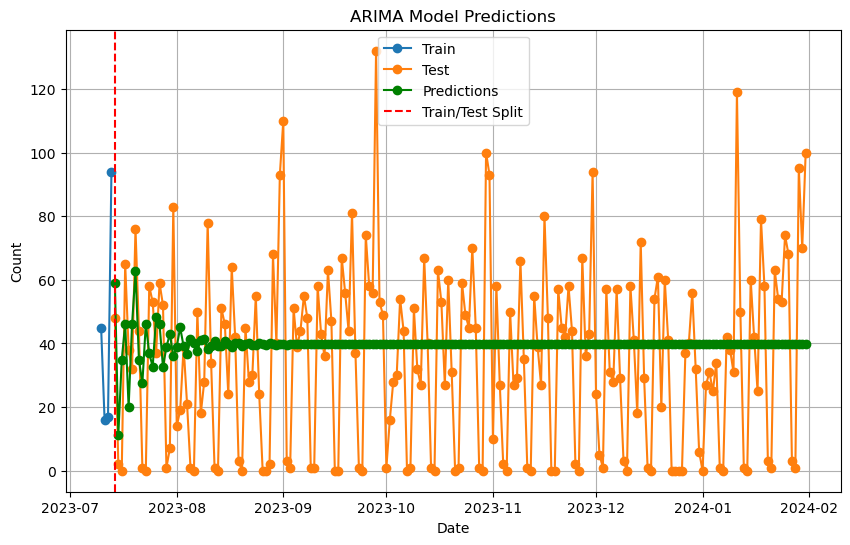

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Check for and handle missing values
data['count'] = data['count'].fillna(0)  # Or use forward fill, interpolation, etc.

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train_data['count'], order=(5, 1, 0))  # Tune parameters as necessary
arima_model = model.fit()

# Get predictions on the test data
forecast = arima_model.get_forecast(steps=len(test_data))
predictions = forecast.predicted_mean

# Create an index for predictions that matches the test data index
predictions_index = test_data.index

# Set the index of predictions
predictions = pd.Series(predictions, index=predictions_index)

# Calculate error metrics
mae = mean_absolute_error(test_data['count'], predictions)
mse = mean_squared_error(test_data['count'], predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Optional: Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index[800:], train_data['count'][800:], label='Train', marker='o')
plt.plot(test_data.index, test_data['count'], label='Test', marker='o')
plt.plot(predictions.index, predictions, label='Predictions', color='g', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('ARIMA Model Predictions')
plt.axvline(test_data.index[0], color='r', linestyle='--', label='Train/Test Split')
plt.legend()
plt.grid()
plt.show()


19:24:21 - cmdstanpy - INFO - Chain [1] start processing
19:24:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (Test): 12.644059182540197
Mean Squared Error (Test): 296.0240657154883


19:24:22 - cmdstanpy - INFO - Chain [1] start processing
19:24:22 - cmdstanpy - INFO - Chain [1] done processing


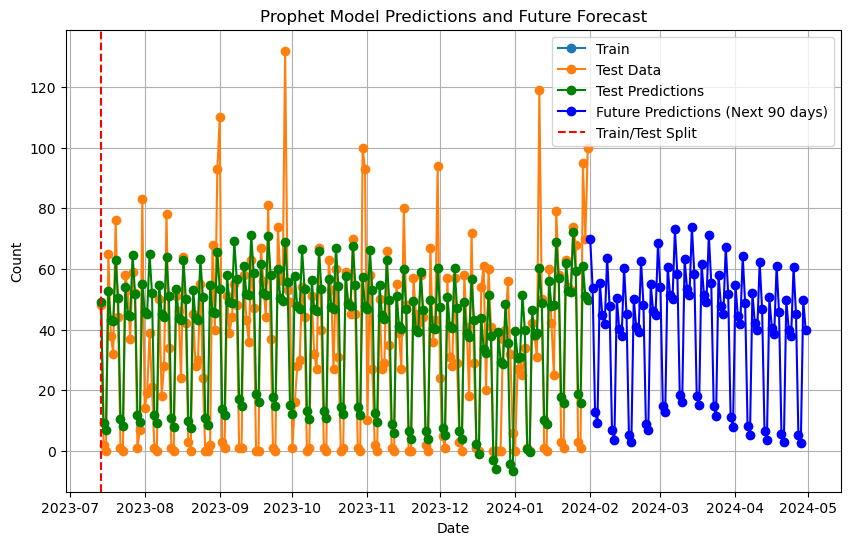

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Prophet requires columns named 'ds' (datetime) and 'y' (target variable)
data_prophet = data.reset_index().rename(columns={'INVOICEDAT': 'ds', 'count': 'y'})

# Handle missing values
data_prophet['y'] = data_prophet['y'].fillna(0)  # Or use forward fill, interpolation, etc.

# Split the data into training and test sets (for evaluation purposes)
train_size = int(len(data_prophet) * 0.8)
train_data, test_data = data_prophet[:train_size], data_prophet[train_size:]

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

# Get the predicted values for the test set
predictions = forecast[['ds', 'yhat']].set_index('ds').loc[test_data['ds']]

# Calculate error metrics for test data predictions
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
mse = mean_squared_error(test_data['y'], predictions['yhat'])
print(f"Mean Absolute Error (Test): {mae}")
print(f"Mean Squared Error (Test): {mse}")

# Train the model again on the entire dataset for future forecasting
model_full = Prophet()
model_full.fit(data_prophet)

# Forecast for the next three months (approx. 90 days)
future_steps = 90
future_dates = model_full.make_future_dataframe(periods=future_steps, freq='D')
future_forecast = model_full.predict(future_dates)

# Get future predictions
future_predictions = future_forecast[['ds', 'yhat']].set_index('ds').iloc[-future_steps:]

# Optional: Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
# Test data plot
plt.plot(train_data['ds'][820:], train_data['y'][820:], label='Train', marker='o')
plt.plot(test_data['ds'], test_data['y'], label='Test Data', marker='o')
# Predictions on test set plot
plt.plot(predictions.index, predictions['yhat'], label='Test Predictions', color='g', marker='o')
# Future forecast plot
plt.plot(future_predictions.index, future_predictions['yhat'], label='Future Predictions (Next 90 days)', color='blue', marker='o')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Prophet Model Predictions and Future Forecast')

# Mark the Train/Test split with a vertical line
plt.axvline(test_data['ds'].iloc[0], color='r', linestyle='--', label='Train/Test Split')

# Legend and grid
plt.legend()
plt.grid()
plt.show()


19:24:28 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing
19:24:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (Test): 118.13410832438073
Mean Squared Error (Test): 16944.323100116588


19:24:30 - cmdstanpy - INFO - Chain [1] done processing


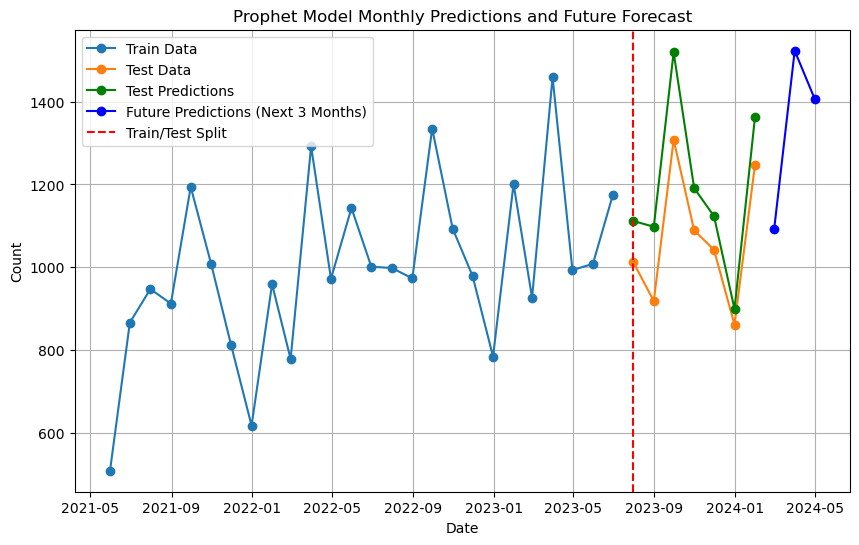

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)

# Convert the data to monthly frequency and sum values within each month
data = data.resample('M').sum()

# Aggregate the data by month and sum the 'count' column
monthly_data = data

# Reset index and prepare data for Prophet
data_prophet = monthly_data.reset_index().rename(columns={'INVOICEDAT': 'ds', 'count': 'y'})

# Handle missing values (optional)
data_prophet['y'] = data_prophet['y'].fillna(0)

# Split the data into training and test sets (for evaluation purposes)
train_size = int(len(data_prophet) * 0.8)
train_data, test_data = data_prophet[:train_size], data_prophet[train_size:]

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_data), freq='M')  # Monthly frequency
forecast = model.predict(future)

# Get the predicted values for the test set
predictions = forecast[['ds', 'yhat']].set_index('ds').loc[test_data['ds']]

# Calculate error metrics for test data predictions
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
mse = mean_squared_error(test_data['y'], predictions['yhat'])
print(f"Mean Absolute Error (Test): {mae}")
print(f"Mean Squared Error (Test): {mse}")

# Train the model again on the entire dataset for future forecasting
model_full = Prophet()
model_full.fit(data_prophet)

# Forecast for the next 3 months
future_steps = 3
future_dates = model_full.make_future_dataframe(periods=future_steps, freq='M')  # Monthly frequency
future_forecast = model_full.predict(future_dates)

# Get future predictions for the next 3 months
future_predictions = future_forecast[['ds', 'yhat']].set_index('ds').iloc[-future_steps:]

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
# Train data plot (Optional, adjust based on dataset size)
plt.plot(train_data['ds'], train_data['y'], label='Train Data', marker='o')
# Test data plot
plt.plot(test_data['ds'], test_data['y'], label='Test Data', marker='o')
# Predictions on test set plot
plt.plot(predictions.index, predictions['yhat'], label='Test Predictions', color='g', marker='o')
# Future forecast plot
plt.plot(future_predictions.index, future_predictions['yhat'], label='Future Predictions (Next 3 Months)', color='blue', marker='o')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Prophet Model Monthly Predictions and Future Forecast')

# Mark the Train/Test split with a vertical line
plt.axvline(test_data['ds'].iloc[0], color='r', linestyle='--', label='Train/Test Split')

# Legend and grid
plt.legend()
plt.grid()
plt.show()


19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:40 - cmdstanpy - INFO - Chain [1] done processing


                   yhat
ds                     
2024-02-29  1092.754449
2024-03-31  1523.078907
2024-04-30  1407.517451


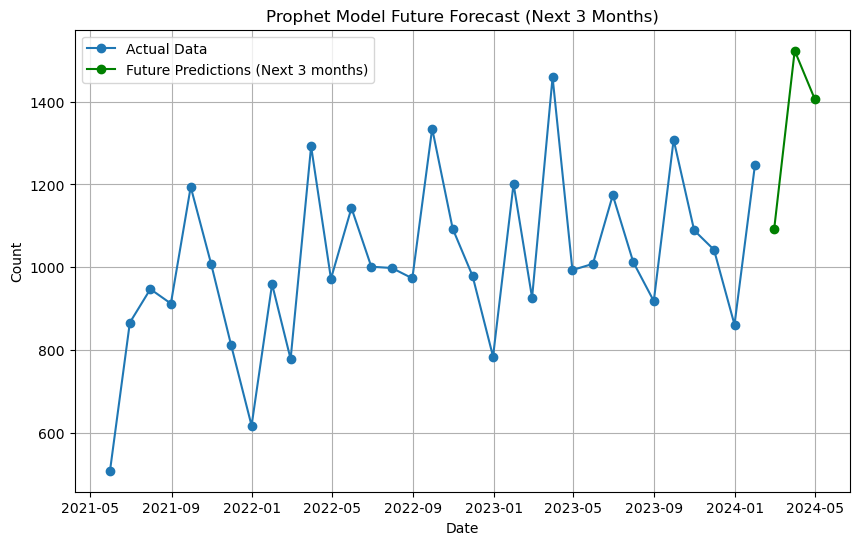

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Ensure the index is a datetime type and prepare data for Prophet
data = sales_data.INVOICEDAT.value_counts().reset_index().sort_values(by='INVOICEDAT').reset_index(drop=True)
data = data.set_index('INVOICEDAT')
data.index = pd.to_datetime(data.index)

# Convert the data to monthly frequency and sum values within each month
data = data.resample('M').sum()

# Prophet requires columns named 'ds' (datetime) and 'y' (target variable)
data_prophet = data.reset_index().rename(columns={'INVOICEDAT': 'ds', 'count': 'y'})

# Handle missing values
data_prophet['y'] = data_prophet['y'].fillna(0)  # Or use forward fill, interpolation, etc.

# Initialize and fit the Prophet model on the entire dataset
model = Prophet()
model.fit(data_prophet)

# Forecast for the next three months (monthly frequency)
future_steps = 3
future_dates = model.make_future_dataframe(periods=future_steps, freq='M')  # Monthly frequency
future_forecast = model.predict(future_dates)

# Get future predictions
future_predictions = future_forecast[['ds', 'yhat']].set_index('ds').iloc[-future_steps:]
print(future_predictions)

# Optional: Plot the future forecast
plt.figure(figsize=(10, 6))
# Plot the actual data
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual Data', marker='o')
# Plot future forecast
plt.plot(future_predictions.index, future_predictions['yhat'], label='Future Predictions (Next 3 months)', color='g', marker='o')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Prophet Model Future Forecast (Next 3 Months)')

# Legend and grid
plt.legend()
plt.grid()
plt.show()


In [35]:
future_predictions

,yhat
ds,
2024-02-29,1092.754449
2024-03-31,1523.078907
2024-04-30,1407.517451
